## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk import everygrams, word_tokenize
from nltk.stem.porter import *
stemmer = PorterStemmer()

## 2. Load Data
Have a look at a few rows in data

In [2]:
df_data = pd.read_csv('./Youtube02-KatyPerry.csv')
df_data.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


## 3. Analyse Data

Display shape of data.

In [3]:
print('display shape of data=' + str(df_data.shape)) 

display shape of data=(350, 5)


display data columns

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


From the above list we can see that data has no null values. So, no data imputation is required.

## 4. Analyse dependant variable-'CLASS'

In [5]:
df_data.CLASS.value_counts()

1    175
0    175
Name: CLASS, dtype: int64

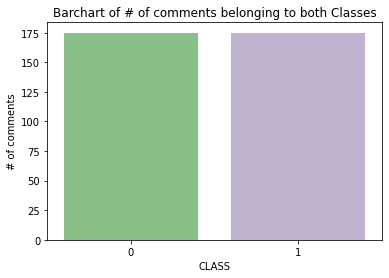

In [6]:
ax= sns.countplot(x="CLASS", data=df_data, palette='Accent');

ax.set(ylabel="# of comments"
       ,title='Barchart of # of comments belonging to both Classes');

## 5. Analyse Authors

In [7]:
print('number of unique authors who have commented=' + str(df_data.AUTHOR.nunique()))

number of unique authors who have commented=342


Next, we will group the data by Authors to get the name of authors who have commented the highest.

In [8]:
df_authors = df_data.groupby('AUTHOR').AUTHOR.value_counts().sort_index(ascending=False).sort_values(ascending=False)

In [9]:
df_authors.head(10)

AUTHOR                   AUTHOR                 
LuckyMusiqLive           LuckyMusiqLive             4
The Technology Zoo       The Technology Zoo         2
roflcopter2110           roflcopter2110             2
KatyPerry TheQueenOfPop  KatyPerry TheQueenOfPop    2
Chris Madzier            Chris Madzier              2
Nathan Waterhouse        Nathan Waterhouse          2
Sanfermuebles Muebles    Sanfermuebles Muebles      1
Shaun Mac                Shaun Mac                  1
Shane Lumsden            Shane Lumsden              1
Serj Cat                 Serj Cat                   1
Name: AUTHOR, dtype: int64

1. Author with name 'LuckyMusiqLive' has commented 4 times which is the highest for this dataset. 
2. Only one user has given four comments and 5 users have 2 comments each. The remaining ~98% of comments have left only 1 comment.

## 6. Analysing Comment

Let us check how many unique comments are there.

In [10]:
print('number of unique comments=' + str(df_data.CONTENT.nunique())) 

number of unique comments=348


There are only  3 duplicate comments in the dataset. These 3 duplicate comments belong to class 0 and are created by different Author.

In [11]:
df_content = df_data.groupby('CONTENT').CONTENT.value_counts().sort_index(ascending=False).sort_values(ascending=False)
df_content.head(4)

CONTENT                                                                                                                                                                                                                                            CONTENT                                                                                                                                                                                                                                          
Katy Perry - Roar (Official): http://youtu.be/CevxZvSJLk8﻿                                                                                                                                                                                         Katy Perry - Roar (Official): http://youtu.be/CevxZvSJLk8﻿                                                                                                                                                                                           3
  HI!:D!:) We’ re TWIN ME

## 7. Analyzing Comment Text

In [12]:
df_data['CONTENT_LENGTH'] = df_data['CONTENT'].str.len()
df_data['CONTENT_LENGTH'].describe()

count     350.000000
mean      107.368571
std       124.213762
min         4.000000
25%        40.000000
50%        71.000000
75%       116.000000
max      1200.000000
Name: CONTENT_LENGTH, dtype: float64

From the above details we can see that 75% of the comments have a length of 116 characters. Now, let us see the histogram of comment lengths.

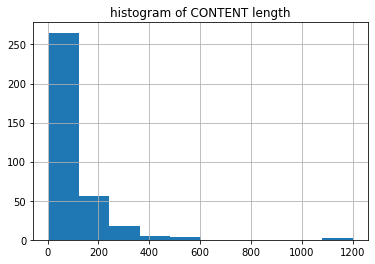

In [13]:
df_data.hist(column ='CONTENT_LENGTH');
plt.title('histogram of CONTENT length');

From the above histogram we can see that the histogram is left skewed. There are only two comments that are long ( more than 1000 characters).

In [40]:
pd.set_option('display.max_colwidth', 140)
df_data[df_data.CONTENT_LENGTH > 1000][['CLASS', 'AUTHOR','CONTENT']]

,CLASS,AUTHOR,CONTENT
31,1,Special Pentrutine,"&lt;script&gt;document.write('&lt;a target=""_self"" href="" http://rover.ebay.com/rover/1/710-53481-19255-0/1?icep_ff3=1&amp;pub=557509679..."
182,1,alin silviu lazar,http://www.googleadservices.com/pagead/aclk?sa=L&amp;ai=CSyOEB1wxVPCfL7D27AbGpYDgBJDPm6IH6MHu05wBgJXbv8sBEAEgkN7lJVCF7byH_f____8BYIOFgIC...


We can see that these long comments both belong to class1.
Let us now check if there is any difference in Content Length between the 2 Classes.

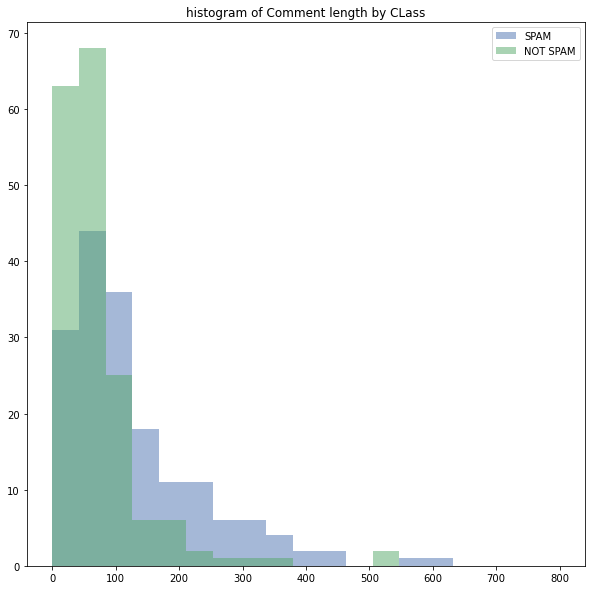

In [15]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
data1 = df_data[df_data.CLASS == 1].CONTENT_LENGTH
data2 = df_data[df_data.CLASS == 0].CONTENT_LENGTH

bins = np.linspace(0, 800, 20)

plt.hist(data1, bins, alpha=0.5, label='SPAM')
plt.hist(data2, bins, alpha=0.5, label='NOT SPAM')
plt.title('histogram of Comment length by CLass');
plt.legend(loc='upper right')
plt.show()

In [16]:
data1.describe()   # printing the distribution of SPAM Content

count     175.000000
mean      142.160000
std       152.082924
min        16.000000
25%        56.000000
50%        99.000000
75%       179.000000
max      1200.000000
Name: CONTENT_LENGTH, dtype: float64

In [17]:
data2.describe()   # printing the distribution of NOTSPAM Content

count    175.000000
mean      72.577143
std       73.367392
min        4.000000
25%       29.500000
50%       58.000000
75%       84.500000
max      520.000000
Name: CONTENT_LENGTH, dtype: float64

In [18]:
print('median of length of SPAM Content=' + str(data1.median()) + 
      ', median of length of NOT SPAM Content=' + str(data2.median()))

median of length of SPAM Content=99.0, median of length of NOT SPAM Content=58.0


## 8. WordCloud

In [19]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [20]:
# remove URL
df_data['tidy_text'] = df_data['CONTENT'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

df_data[['CONTENT', 'tidy_text']]

,CONTENT,tidy_text
0,i love this so much. AND also I Generate Free ...,i love this so much. AND also I Generate Free ...
1,http://www.billboard.com/articles/columns/pop-...,Vote for SONES please....we're against vips.....
2,Hey guys! Please join me in my fight to help a...,Hey guys! Please join me in my fight to help a...
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,this is the song﻿
4,Hey everyone. Watch this trailer!!!!!!!! http...,Hey everyone. Watch this trailer!!!!!!!!
...,...,...
345,This song means so much to me thank you soooo...,This song means so much to me thank you soooo...
346,&lt;3﻿,&lt;3﻿
347,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...","KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA..."
348,Honestly speaking except taylor swift and adel...,Honestly speaking except taylor swift and adel...


In [21]:
# remove special chars
df_data['tidy_text'] = df_data['tidy_text'].str.replace('[^a-zA-Z#]',' ')
df_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH,tidy_text
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1,126,i love this so much AND also I Generate Free ...
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1,159,Vote for SONES please we re against vips ...
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1,340,Hey guys Please join me in my fight to help a...
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1,52,this is the song
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1,80,Hey everyone Watch this trailer


In [22]:
#Tokenizing
tokenized_text = df_data['tidy_text'].apply(lambda x: x.split())
tokenized_text.head()

# Stemming
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i)
                                                  for i in x])

In [23]:
for i in range (len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
df_data['tidy_text'] = tokenized_text

df_data['tidy_text'].head()

0    i love thi so much and also I gener free lead ...
1    vote for sone pleas we re against vip pleas he...
2    hey guy pleas join me in my fight to help abus...
3                                      thi is the song
4                        hey everyon watch thi trailer
Name: tidy_text, dtype: object

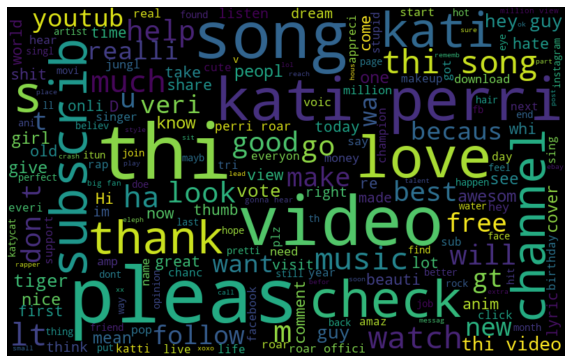

In [24]:
all_words = ' '.join([text for text in df_data['tidy_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 9. Unigrams and Bigrams
#### 9.1 Unigrams

In [25]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# to lowercase
df_data['content_lowercase'] = df_data['CONTENT'].str.lower()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_data['content_without_stopwords'] = df_data['content_lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


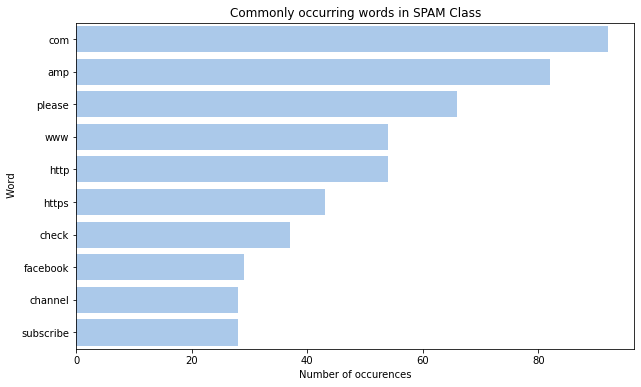

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_data[df_data.CLASS==1].content_without_stopwords)
frequencies = sum(sparse_matrix).toarray()[0]
df_frequencies = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])


df_frequencies.reset_index(inplace=True)
df_frequencies_sorted = df_frequencies.sort_values(by=['frequency'], inplace=False, ascending=False)
df_frequencies_sorted = df_frequencies_sorted[0: 10]

sns.set_color_codes("pastel")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="frequency", y="index", data=df_frequencies_sorted,
            label="Total", color="b");

ax.set(ylabel=" Word",
       xlabel="Number of occurences",title='Commonly occurring words in SPAM Class');

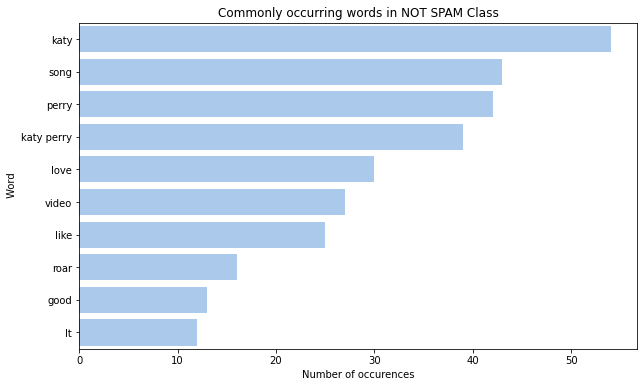

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_data[df_data.CLASS==0].content_without_stopwords)
frequencies = sum(sparse_matrix).toarray()[0]
df_frequencies = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])


df_frequencies.reset_index(inplace=True)
df_frequencies_sorted = df_frequencies.sort_values(by=['frequency'], inplace=False, ascending=False)
df_frequencies_sorted = df_frequencies_sorted[0: 10]


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="frequency", y="index", data=df_frequencies_sorted,
            label="Total", color="b");
ax.set(ylabel=" Word",
       xlabel="Number of occurences", title='Commonly occurring words in NOT SPAM Class');

#### 9.2 Bigrams

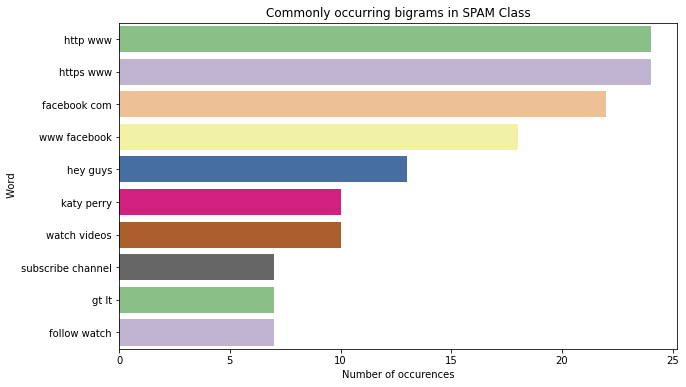

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_data[df_data.CLASS==1].content_without_stopwords)
frequencies = sum(sparse_matrix).toarray()[0]
df_frequencies = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])


df_frequencies.reset_index(inplace=True)
df_frequencies_sorted = df_frequencies.sort_values(by=['frequency'], inplace=False, ascending=False)
df_frequencies_sorted = df_frequencies_sorted[0: 10]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="frequency", y="index", data=df_frequencies_sorted,
            label="Total", palette = 'Accent');

ax.set(ylabel=" Word",
       xlabel="Number of occurences",title='Commonly occurring bigrams in SPAM Class');

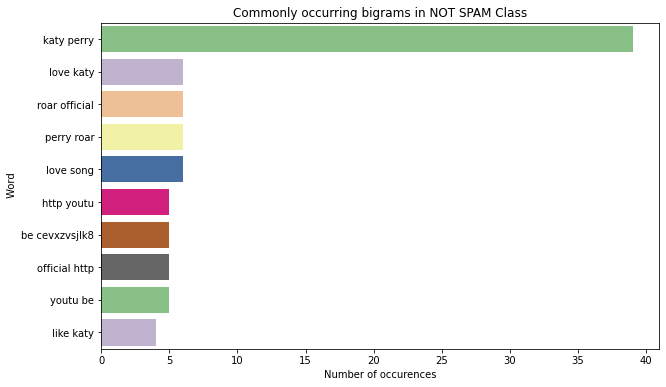

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_data[df_data.CLASS==0].content_without_stopwords)
frequencies = sum(sparse_matrix).toarray()[0]
df_frequencies = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])


df_frequencies.reset_index(inplace=True)
df_frequencies_sorted = df_frequencies.sort_values(by=['frequency'], inplace=False, ascending=False)
df_frequencies_sorted = df_frequencies_sorted[0: 10]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="frequency", y="index", data=df_frequencies_sorted,
            label="Total", palette = 'Accent');

ax.set(ylabel=" Word",
       xlabel="Number of occurences",title='Commonly occurring bigrams in NOT SPAM Class');

## 9. Analyzing Date

In [54]:
df_datesdata = pd.read_csv('./Youtube02-KatyPerry.csv', index_col=2, parse_dates=True)
df_datesdata.head(5)

,COMMENT_ID,AUTHOR,CONTENT,CLASS
DATE,,,,
2014-07-22 15:27:50,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can Too! http://www.MyLeaderGate.com/moretraffic﻿,1
2014-07-27 01:57:16,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SONES please....we're against vips....plea...,1
2014-07-27 02:51:43,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,Hey guys! Please join me in my fight to help abused/mistreated animals! All fund will go to helping pay for vet bills/and or helping th...,1
2014-08-01 12:27:48,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,http://psnboss.com/?ref=2tGgp3pV6L this is the song﻿,1
2014-08-01 21:04:03,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,Hey everyone. Watch this trailer!!!!!!!! http://believemefilm.com?hlr=h2hQBUVB﻿,1


In [31]:
# Add columns with year, month, and weekday name
df_datesdata['Year'] = df_datesdata.index.year
df_datesdata['Month'] = df_datesdata.index.month
df_datesdata['Weekday_Name'] = df_datesdata.index.day_name()
# Display a random sampling of 5 rows
df_datesdata.sample(5, random_state=0)

,COMMENT_ID,AUTHOR,CONTENT,CLASS,Year,Month,Weekday_Name
DATE,,,,,,,
2014-08-03 21:20:41,z13xizvwrki2hf2ev22txvrp2ovcyf3zq04,Jayki L,"Subscribe pleaaaase to my instagram account , ...",1,2014,8,Sunday
2014-09-03 16:32:59,z121gbuy2unhc5m4n04cf3kyslqhepeqgvo0k,Santeri Saariokari,"Hey guys go to check my video name ""growtopia ...",1,2014,9,Wednesday
2014-10-29 09:53:12,z12yirkj4lzkupsnl222tbl5zwnwxfepj04,Boshra Abdrhman,Love it﻿,0,2014,10,Wednesday
2014-08-30 23:08:02,z133sbv5xomtsp44k04cinywcr3sedjqekc0k,ocean pacific,The new Makeup Transformation with Integrated ...,1,2014,8,Saturday
2014-11-06 02:47:23,z122g12wzuztdjac4232jxuomqylcfjhc04,William Carey,"This song is the most boring, asinine song I h...",0,2014,11,Thursday


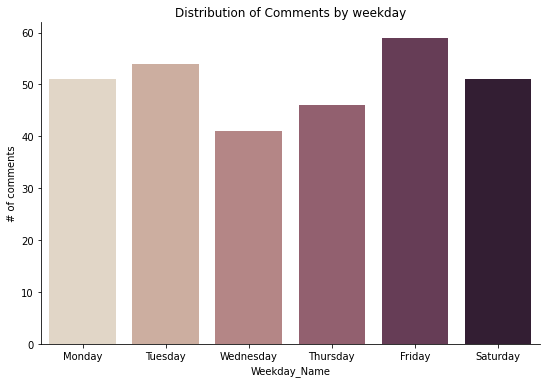

In [32]:
ax= sns.catplot(kind="count", x="Weekday_Name", palette="ch:.25", aspect=1.5, data=df_datesdata,
           order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);

ax.set(ylabel="# of comments",
       title='Distribution of Comments by weekday');

In [33]:
df_datesdata['Weekday_Name'].value_counts()

Friday       59
Tuesday      54
Saturday     51
Monday       51
Sunday       48
Thursday     46
Wednesday    41
Name: Weekday_Name, dtype: int64